<a href="https://colab.research.google.com/github/santiagosaldivar/APMTH115/blob/main/Final_Project_SaldivarSantiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Santiago Saldivar

Dr. Michael Brenner

Applied Mathematics 115

May 8, 2024

PART 1: The Naive Model

In [1]:
# import necessary packages
import numpy as np # for many mathematical computations
import scipy # for mathematics as well
import pandas as pd # for handling data
import random # for setting seeds
import matplotlib.pyplot as plt # for graphing

In [2]:
# import dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Senior year/APMTH 115/Final Project/Data/KaggleMatches.csv')

Mounted at /content/drive


<ipython-input-2-bc7c6769bf81>:5: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Senior year/APMTH 115/Final Project/Data/KaggleMatches.csv')


In [3]:
# check dataset
print(df)

       tourney_id  tourney_name surface draw_size tourney_level tourney_date  \
0       2019-M020      Brisbane    Hard        32             A   2018-12-31   
1       2019-M020      Brisbane    Hard        32             A   2018-12-31   
2       2019-M020      Brisbane    Hard        32             A   2018-12-31   
3       2019-M020      Brisbane    Hard        32             A   2018-12-31   
4       2019-M020      Brisbane    Hard        32             A   2018-12-31   
...           ...           ...     ...       ...           ...          ...   
373431  1978-W001  Wightman Cup  Carpet       0.0             D   1978-11-03   
373432  1978-W001  Wightman Cup  Carpet       0.0             D   1978-11-03   
373433  1978-W001  Wightman Cup  Carpet       0.0             D   1978-11-03   
373434  1978-W001  Wightman Cup  Carpet       0.0             D   1978-11-03   
373435  1978-W001  Wightman Cup  Carpet       0.0             D   1978-11-03   

        match_num  winner_id winner_see

In [4]:
# limit dataset to after 1998
df['tourney_date'] = pd.to_datetime(df['tourney_date']) # Convert the string column to datetime format
after_date = pd.to_datetime('1998-12-31')
date_mask = df['tourney_date'] >= after_date # did the match occur in 2016 or later?

filtered_df = df[date_mask]
print(filtered_df)
#check the dates
#df_sorted = filtered_df.sort_values(by='tourney_date')
#print(df_sorted)

                    tourney_id            tourney_name surface draw_size  \
0                    2019-M020                Brisbane    Hard        32   
1                    2019-M020                Brisbane    Hard        32   
2                    2019-M020                Brisbane    Hard        32   
3                    2019-M020                Brisbane    Hard        32   
4                    2019-M020                Brisbane    Hard        32   
...                        ...                     ...     ...       ...   
297981  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297982  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297983  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297984  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297985  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   

       tourney_level tourney_date  match_num  winner_id winner_seed  \
0               

In [5]:
# only include rows for women's matches
# Specific value to filter for
filter_value = 'wta'

# Create boolean mask based on WTA being in column
value_mask = filtered_df['league'] == filter_value

# Subset the dataframe using the mask
filtered_df = filtered_df[value_mask]

print(filtered_df)

                    tourney_id            tourney_name surface draw_size  \
213214  1999-W-SL-AUS-01A-1999         Australian Open    Hard     128.0   
213215  1999-W-SL-AUS-01A-1999         Australian Open    Hard     128.0   
213216  1999-W-SL-AUS-01A-1999         Australian Open    Hard     128.0   
213217  1999-W-SL-AUS-01A-1999         Australian Open    Hard     128.0   
213218  1999-W-SL-AUS-01A-1999         Australian Open    Hard     128.0   
...                        ...                     ...     ...       ...   
297981  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297982  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297983  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297984  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   
297985  2008-W-WT-QAT-01A-2008  WTA Tour Championships    Hard         4   

       tourney_level tourney_date  match_num  winner_id winner_seed  \
213214          

In [6]:
# order ELO training data by date (asecnding order is default)
training_df = filtered_df.sort_values(by = ['tourney_date', 'tourney_name', 'round'])\

# Define custom sorting order
custom_order = ['BR', 'RR', 'R128', 'R64', 'R32', 'R16', 'QF', 'SF', 'F']

# Sort DataFrame by 'round' column using custom order
training_df_sorted = training_df.sort_values(by='round', key=lambda x: x.map({k: i for i, k in enumerate(custom_order)}))

# limit training dataframe to before 2018 (so we can predict 2018 using ELO)
before_date = pd.to_datetime('2018-08-01')
date_mask_2 = training_df_sorted['tourney_date'] <= before_date
training_df_sorted = training_df_sorted[date_mask_2]

In [7]:
# restrict dataset to players who played in the US open.
# this is for finding players, not for the ELO Score dataset
# Specific value to filter for filtering
filter_value = 'US Open'

# Create boolean mask based on WTA being in column
value_mask = filtered_df['tourney_name'] == filter_value

# Subset the dataframe using the mask
US_Open = filtered_df[value_mask]

# get unique id for US Open 2018
print(US_Open['tourney_id'].unique()) #note: tourney id is 2018-560

['1999-W-SL-USA-01A-1999' '2012-W-SL-USA-01A-2012'
 '2006-W-SL-USA-01A-2006' '2007-W-SL-USA-01A-2007'
 '2013-W-SL-USA-01A-2013' '2005-W-SL-USA-01A-2005'
 '2011-W-SL-USA-01A-2011' '2010-W-SL-USA-01A-2010'
 '2004-W-SL-USA-01A-2004' '2000-W-SL-USA-01A-2000'
 '2014-W-SL-USA-01A-2014' '2015-W-SL-USA-01A-2015'
 '2001-W-SL-USA-01A-2001' '2017-560' '2003-W-SL-USA-01A-2003'
 '2002-W-SL-USA-01A-2002' '2016-560' '2018-560' '2009-W-SL-USA-01A-2009'
 '2008-W-SL-USA-01A-2008']


In [8]:
# get only those women that played in US open in 2018
# first obtain the 2018 US Open matches (women only)
US_Open_2018 = US_Open.loc[US_Open['tourney_id'] == '2018-560']

# obtain the top three players
print(US_Open_2018['winner_name'][US_Open_2018['round'] == 'F']) #1: Naomi Osaka
print(US_Open_2018['loser_name'][US_Open_2018['round'] == 'F']) #2: Serena Williams
print(US_Open_2018['loser_name'][US_Open_2018['round']=='SF']) #semifinalists (not winners)
# Naomi Osaka, Serena Williams, (Anastasija Sevastova / Madison Keys).

# next, obtain the list of women that played in these matches
winners_and_losers = pd.concat([US_Open_2018['winner_name'], US_Open_2018['loser_name']])

# now, eliminate repeat names
unique_women = winners_and_losers.unique().tolist()
print(unique_women)
print(US_Open_2018['round'].unique()) # rounds to be used later

286912    Naomi Osaka
Name: winner_name, dtype: object
286912    Serena Williams
Name: loser_name, dtype: object
286910    Anastasija Sevastova
286911            Madison Keys
Name: loser_name, dtype: object
['Kaia Kanepi', 'Jil Belen Teichmann', 'Vania King', 'Rebecca Peterson', 'Serena Williams', 'Carina Witthoeft', 'Camila Giorgi', 'Venus Williams', 'Garbine Muguruza', 'Karolina Muchova', 'Lucie Safarova', 'Ashleigh Barty', 'Maria Sakkari', 'Sofia Kenin', 'Ana Bogdan', 'Karolina Pliskova', 'Sloane Stephens', 'Anhelina Kalinina', 'Victoria Azarenka', 'Daria Gavrilova', 'Barbora Zahlavova Strycova', 'Lara Arruabarrena', 'Vera Lapko', 'Elise Mertens', 'Julia Goerges', 'Ekaterina Makarova', 'Claire Liu', 'Anastasija Sevastova', 'Qiang Wang', 'Irina Camelia Begu', 'Tatjana Maria', 'Elina Svitolina', 'Caroline Garcia', 'Monica Puig', 'Kristina Mladenovic', 'Carla Suarez Navarro', 'Maria Sharapova', 'Sorana Cirstea', 'Taylor Townsend', 'Jelena Ostapenko', 'Madison Keys', 'Bernarda Pera', 'A

131.7571204402084


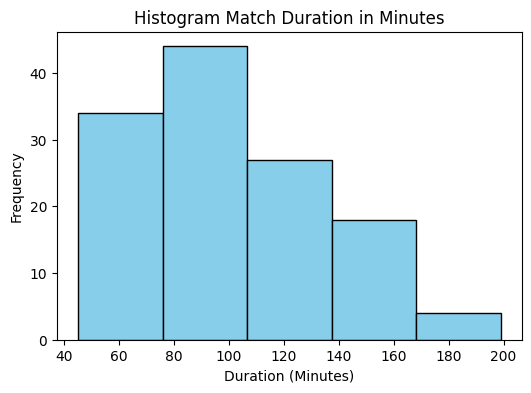

In [9]:
# calculate the mean length of the games in the US Open
mean_mins = US_Open_2018['minutes'].mean()
sd_mins = US_Open_2018['minutes'].std()
upper_bound_mins = mean_mins + sd_mins
print(upper_bound_mins)

# double check that there aren't TOO many high values
plt.figure(figsize=(6, 4))
US_Open_2018['minutes'].hist(bins=5, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram Match Duration in Minutes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Next, create a dictionary which stores each players ELO scores and updates them as each game goes through.

QUESTION: Do I need two dictionaries, one for ELO scores and one for probabilities of winning (converted from ELO scores)?

In [10]:
#define logistic function (utility)
def logistic(x):
    return 1 / (1 + 10**-x)

#given two ELO scores, compute P(A wins over B)
def expected_game_score(team_a_elo, team_b_elo, S=400):
    return logistic((team_a_elo - team_b_elo)/S)

In [11]:
#set up initial elo scores - same for each team
INITIAL_ELO = 1500
INITIAL_PENALTY = 0
PLAYER_ELO = dict([(player,[INITIAL_ELO]) for player in sorted(unique_women)])
players_scoring = dict([(player, 0) for player in sorted(unique_women)])

# learning constant
K = 20

In [12]:
#loop through the data and update
counter = 0

for index, row in training_df_sorted.iterrows(): #index: current row number

    # check if the players are in the 2018 US Open
    if row['winner_name'] in unique_women and row['loser_name'] in unique_women:
      counter += 1
      winner = row['winner_name']
      loser = row['loser_name']

      #get latest elo scores
      elo_winner = PLAYER_ELO[winner][-1]
      elo_loser = PLAYER_ELO[loser][-1]

      #calculate prob of winning for each team
      p_winner = expected_game_score(elo_winner, elo_loser)
      p_loser = expected_game_score(elo_loser, elo_winner) #should be 1 - p_winner

      # calculate and append new elo scores to the list
      new_elo_winner = elo_winner + K * (1 - p_winner)
      new_elo_loser = elo_loser + K * (0 - p_loser)

      PLAYER_ELO[winner].append(new_elo_winner)
      PLAYER_ELO[loser].append(new_elo_loser)

In [56]:
print("Number of matches used to determine ELO scores:", counter)

Number of matches used to determine ELO scores: 8181


In [16]:
# Extract last value for each key
last_values = {key: values[-1] for key, values in PLAYER_ELO.items()}

# Create DataFrame
last_values_df = pd.DataFrame(list(last_values.items()), columns=['Player', 'Elo Score'])
print(last_values_df)

                    Player    Elo Score
0      Agnieszka Radwanska  1641.127088
1         Ajla Tomljanovic  1409.263522
2        Aleksandra Krunic  1396.597790
3    Aliaksandra Sasnovich  1483.059684
4             Alison Riske  1492.764205
..                     ...          ...
123        Whitney Osuigwe  1490.000000
124             Yafan Wang  1457.678520
125       Yanina Wickmayer  1455.403434
126       Yulia Putintseva  1377.000543
127           Zarina Diyas  1397.522253

[128 rows x 2 columns]


In [13]:
# get the latest elo score for players (at start of 2018) as a dictionary
last_values_dict = {}

for key, value in PLAYER_ELO.items():
    last_values_dict[key] = value[-1]

print(last_values_dict)
print(len(last_values_dict))

{'Agnieszka Radwanska': 1641.1270878079506, 'Ajla Tomljanovic': 1409.2635224101384, 'Aleksandra Krunic': 1396.5977897919536, 'Aliaksandra Sasnovich': 1483.0596844666643, 'Alison Riske': 1492.764205122817, 'Alison Van Uytvanck': 1431.449868483318, 'Alize Cornet': 1521.4548587793145, 'Amanda Anisimova': 1537.8805454770425, 'Ana Bogdan': 1414.8231818211814, 'Anastasia Pavlyuchenkova': 1618.5624319858625, 'Anastasija Sevastova': 1492.9065928493064, 'Andrea Petkovic': 1500.7559023802346, 'Anett Kontaveit': 1530.6667308044725, 'Angelique Kerber': 1642.6278174578251, 'Anhelina Kalinina': 1477.417071663195, 'Anna Blinkova': 1427.9092756433242, 'Anna Kalinskaya': 1422.9481394198633, 'Anna Karolina Schmiedlova': 1442.5246954260103, 'Arantxa Rus': 1387.9269577477519, 'Aryna Sabalenka': 1524.9575451595786, 'Ashleigh Barty': 1531.4834118658346, 'Asia Muhammed': 1483.8305593304738, 'Barbora Zahlavova Strycova': 1437.6538613192256, 'Belinda Bencic': 1571.2541732656068, 'Bernarda Pera': 1478.355981023

In [59]:
# check how Dictionary looks
#PLAYER_ELO

In [14]:
# Define function to assign probabilities based on ELO Scores
def convert_elo_to_pair_probabilities(elo_scores):
    """
    Converts a list of ELO scores to a matrix of pairwise winning probabilities.

    Args:
        elo_scores: A list of ELO scores for each team.

    Returns:
        A NumPy array of pairwise winning probabilities.
    """
    # get player names and number of players
    player_names = elo_scores['Player'].tolist()
    N_players = len(elo_scores)

    # Create a dictionary to store pairwise probabilities for each team
    pairwise_probabilities = {}
    for player in player_names:
        pairwise_probabilities[player] = {}

  # Calculate the probability of each team winning against each other team.
    for i in range(N_players):

        player1 = player_names[i]
        elo1 = elo_scores.loc[i, 'Elo Score']
        pairwise_probabilities[player1][player1] = 0.5

        for j in range(i + 1, N_players):
            player2 = player_names[j]
            elo2 = elo_scores.loc[j, 'Elo Score']

            probability_team1_wins = expected_game_score(elo1, elo2)
            pairwise_probabilities[player1][player2] = probability_team1_wins
            pairwise_probabilities[player2][player1] = 1 - probability_team1_wins

    return pairwise_probabilities

In [17]:
# create pairwise prob. matrix
P = convert_elo_to_pair_probabilities(last_values_df)
print(P)

{'Agnieszka Radwanska': {'Agnieszka Radwanska': 0.5, 'Ajla Tomljanovic': 0.7916193122114995, 'Aleksandra Krunic': 0.8033908825537334, 'Aliaksandra Sasnovich': 0.7129815648283003, 'Alison Riske': 0.7014150693638249, 'Alison Van Uytvanck': 0.7697675435260296, 'Alize Cornet': 0.6657196728554554, 'Amanda Anisimova': 0.6443591475944429, 'Ana Bogdan': 0.7862907184804168, 'Anastasia Pavlyuchenkova': 0.532427569494111, 'Anastasija Sevastova': 0.701243380190399, 'Andrea Petkovic': 0.6916920023679922, 'Anett Kontaveit': 0.6538172194805187, 'Angelique Kerber': 0.4978402898564101, 'Anhelina Kalinina': 0.7195822958377885, 'Anna Blinkova': 0.7733597523361809, 'Anna Kalinskaya': 0.7783262346482518, 'Anna Karolina Schmiedlova': 0.7582753427628401, 'Arantxa Rus': 0.8111556935170476, 'Aryna Sabalenka': 0.6612177506278988, 'Ashleigh Barty': 0.6527523819238444, 'Asia Muhammed': 0.7120726198153267, 'Barbora Zahlavova Strycova': 0.7633773957942658, 'Belinda Bencic': 0.5992211209046027, 'Bernarda Pera': 0.71

In [18]:
def round128(round128players, P):
  # create empty winners list
  winners128 = []

  # for loop for each matching
  for matchup in round128players:
    player1 = matchup[0]
    player2 = matchup[1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winners128.append(player1)
    else:
      winners128.append(player2)

  return winners128

In [19]:
def round64(round64players, P):
  placeholder = 0
  winners64 = []
  for i in range(len(round64players) // 2):
    player1 = round64players[placeholder]
    player2 = round64players[placeholder + 1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winners64.append(player1)
    else:
      winners64.append(player2)

    placeholder = placeholder + 2

  return winners64

In [20]:
# simulate round of 32 (R32)
def round32(round32players, P):
  placeholder = 0
  winners32 = []
  for i in range(len(round32players) // 2):
    player1 = round32players[placeholder]
    player2 = round32players[placeholder + 1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winners32.append(player1)
    else:
      winners32.append(player2)

    placeholder = placeholder + 2

  return winners32

In [21]:
# simulate round of 16 (R16)
def round16(round16players, P):
  placeholder = 0
  winners16 = []
  for i in range(len(round16players) // 2):
    player1 = round16players[placeholder]
    player2 = round16players[placeholder + 1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winners16.append(player1)
    else:
      winners16.append(player2)

    placeholder = placeholder + 2

  return winners16

In [22]:
# simulate quarterfinals (QF)
def roundQF(roundQFplayers, P):
  placeholder = 0
  winnersQF = []
  for i in range(len(roundQFplayers) // 2):
    player1 = roundQFplayers[placeholder]
    player2 = roundQFplayers[placeholder + 1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winnersQF.append(player1)
    else:
      winnersQF.append(player2)

    placeholder = placeholder + 2

  return winnersQF

In [23]:
# simulate semifinals (SF)
def roundSF(roundSFplayers, P):
  placeholder = 0
  winnersSF = []
  for i in range(len(roundSFplayers) // 2):
    player1 = roundSFplayers[placeholder]
    player2 = roundSFplayers[placeholder + 1]
    probability = np.random.uniform()
    if probability < P[player1][player2]:
        winnersSF.append(player1)
    else:
      winnersSF.append(player2)

    placeholder = placeholder + 2

  return winnersSF

In [24]:
# simulate finals (F)
def roundF(roundFplayers, P):
  winnerF = ""
  player1 = roundFplayers[0]
  player2 = roundFplayers[1]
  probability = np.random.uniform()
  if probability < P[player1][player2]:
    winnerF = player1
  else:
    winnerF = player2

  return winnerF

In [25]:
# simulate round of 128 (R128)
random.seed(10) # set seed
# first get the names of the players
US_Open_2018_r128 = US_Open_2018.loc[US_Open_2018['round'] == 'R128']
round128players = [(row['winner_name'], row['loser_name']) for index, row in US_Open_2018_r128.iterrows()]

In [26]:
def simulate_tournament(round128players, P):
  round64players = round128(round128players, P)

  # simulate round of 64 (R64)
  random.shuffle(round64players) # randomize next groupings
  round32players = round64(round64players, P)

  # simulate round of 32 (R32)
  random.shuffle(round32players) # randomize next groupings
  round16players = round32(round32players, P)

  # simulate round of 16 (R16)
  random.shuffle(round16players) # randomize next groupings
  roundQFplayers = round16(round16players, P)

  # simulate quarterfinals round (QF)
  random.shuffle(roundQFplayers) # randomize next groupings
  roundSFplayers = roundQF(roundQFplayers, P)

  # simulate semifinals
  random.shuffle(roundSFplayers)
  roundFplayers = roundSF(roundSFplayers, P)

  # simulate final match
  winner = roundF(roundFplayers, P)

  return winner

In [27]:
simulate_tournament(round128players, P)

'Serena Williams'

In [28]:
# function to simulate the tournament x times.
def simulate_tournament_multiple_times(round128players, P, n, dictionary):


    # Simulate the tournament 'n' times
    for _ in range(n):
        winner = simulate_tournament(round128players, P)
        dictionary[winner] = dictionary[winner] + 1

    return dictionary


Tournament Results:
Serena Williams: 277 wins
Petra Kvitova: 125 wins
Victoria Azarenka: 100 wins
Maria Sharapova: 47 wins
Venus Williams: 45 wins
Elina Svitolina: 40 wins
Sloane Stephens: 29 wins
Simona Halep: 27 wins
Agnieszka Radwanska: 25 wins
Angelique Kerber: 20 wins
Svetlana Kuznetsova: 20 wins
Anastasia Pavlyuchenkova: 18 wins
Elise Mertens: 16 wins
Karolina Pliskova: 16 wins
Caroline Wozniacki: 13 wins
Garbine Muguruza: 13 wins
Dominika Cibulkova: 11 wins
Vera Zvonareva: 10 wins
Amanda Anisimova: 8 wins
Belinda Bencic: 8 wins
Lucie Safarova: 8 wins
Johanna Konta: 7 wins
Samantha Stosur: 6 wins
Francesca Di Lorenzo: 5 wins
Irina Camelia Begu: 5 wins
Kiki Bertens: 5 wins
Tamara Zidansek: 5 wins
Anett Kontaveit: 4 wins
Harmony Tan: 4 wins
Lesia Tsurenko: 4 wins
Madison Keys: 4 wins
Timea Bacsinszky: 4 wins
Daria Gavrilova: 3 wins
Darya Kasatkina: 3 wins
Eugenie Bouchard: 3 wins
Jelena Ostapenko: 3 wins
Whitney Osuigwe: 3 wins
Alize Cornet: 2 wins
Andrea Petkovic: 2 wins
Anna Blin

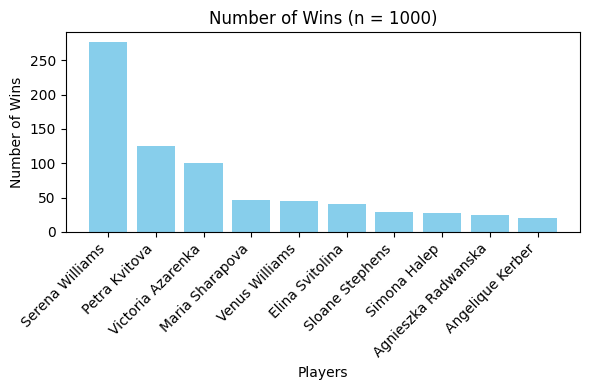

In [29]:
# n = 1000:
random.seed(10)
n = 1000  # Number of times to simulate the tournament
players_scoring = dict([(player, 0) for player in sorted(unique_women)])
results = simulate_tournament_multiple_times(round128players, P, n, players_scoring)
results = dict(sorted(results.items(), key=lambda item: item[1], reverse = True))
print("Tournament Results:")
for player, wins in results.items():
    print(f"{player}: {wins} wins")

df_sim_1000 = pd.DataFrame(list(results.items()), columns=['Player', 'Wins'])
# Take the top 10 players
top_10 = df_sim_1000.head(10)

# Create the histogram
plt.figure(figsize=(6, 4))
plt.bar(top_10['Player'], top_10['Wins'], color='skyblue')
plt.xlabel('Players')
plt.ylabel('Number of Wins')
plt.title('Number of Wins (n = 1000)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Tournament Results:
Serena Williams: 1388 wins
Petra Kvitova: 572 wins
Victoria Azarenka: 457 wins
Maria Sharapova: 316 wins
Venus Williams: 263 wins
Elina Svitolina: 246 wins
Simona Halep: 161 wins
Agnieszka Radwanska: 122 wins
Sloane Stephens: 121 wins
Svetlana Kuznetsova: 112 wins
Angelique Kerber: 102 wins
Anastasia Pavlyuchenkova: 78 wins
Karolina Pliskova: 71 wins
Caroline Wozniacki: 59 wins
Samantha Stosur: 47 wins
Dominika Cibulkova: 42 wins
Elise Mertens: 42 wins
Garbine Muguruza: 39 wins
Madison Keys: 36 wins
Irina Camelia Begu: 33 wins
Jelena Ostapenko: 33 wins
Johanna Konta: 33 wins
Kiki Bertens: 33 wins
Julia Goerges: 32 wins
Vera Zvonareva: 30 wins
Belinda Bencic: 28 wins
Tamara Zidansek: 27 wins
Laura Siegemund: 26 wins
Timea Bacsinszky: 23 wins
Darya Kasatkina: 21 wins
Lesia Tsurenko: 20 wins
Daria Gavrilova: 17 wins
Lucie Safarova: 16 wins
Ekaterina Makarova: 15 wins
Monica Niculescu: 15 wins
Caroline Garcia: 14 wins
Alize Cornet: 12 wins
Carla Suarez Navarro: 12 wins


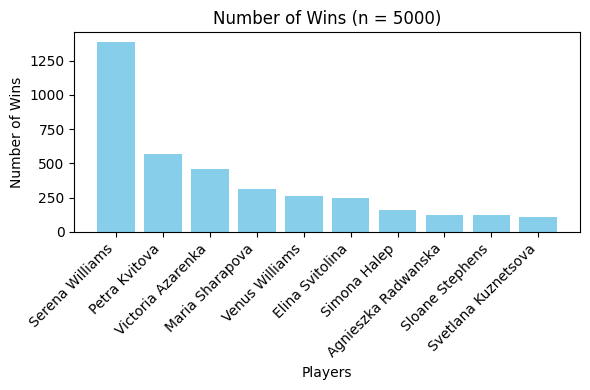

In [30]:
# n = 5000:
random.seed(10)
n = 5000  # Number of times to simulate the tournament
players_scoring = dict([(player, 0) for player in sorted(unique_women)])
results = simulate_tournament_multiple_times(round128players, P, n, players_scoring)
results = dict(sorted(results.items(), key=lambda item: item[1], reverse = True))
print("Tournament Results:")
for player, wins in results.items():
    print(f"{player}: {wins} wins")

df_sim_5000 = pd.DataFrame(list(results.items()), columns=['Player', 'Wins'])
# Take the top 10 players
top_10 = df_sim_5000.head(10)

# Create the histogram
plt.figure(figsize=(6, 4))
plt.bar(top_10['Player'], top_10['Wins'], color='skyblue')
plt.xlabel('Players')
plt.ylabel('Number of Wins')
plt.title('Number of Wins (n = 5000)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Tournament Results:
Serena Williams: 2675 wins
Petra Kvitova: 1229 wins
Victoria Azarenka: 1027 wins
Maria Sharapova: 630 wins
Venus Williams: 484 wins
Elina Svitolina: 414 wins
Simona Halep: 296 wins
Sloane Stephens: 273 wins
Agnieszka Radwanska: 219 wins
Angelique Kerber: 215 wins
Svetlana Kuznetsova: 213 wins
Karolina Pliskova: 167 wins
Anastasia Pavlyuchenkova: 146 wins
Caroline Wozniacki: 123 wins
Elise Mertens: 117 wins
Samantha Stosur: 115 wins
Dominika Cibulkova: 91 wins
Garbine Muguruza: 87 wins
Kiki Bertens: 65 wins
Vera Zvonareva: 65 wins
Johanna Konta: 63 wins
Madison Keys: 60 wins
Belinda Bencic: 56 wins
Irina Camelia Begu: 54 wins
Darya Kasatkina: 52 wins
Julia Goerges: 52 wins
Jelena Ostapenko: 50 wins
Lucie Safarova: 50 wins
Lesia Tsurenko: 45 wins
Amanda Anisimova: 40 wins
Laura Siegemund: 39 wins
Daria Gavrilova: 38 wins
Ashleigh Barty: 36 wins
Tamara Zidansek: 35 wins
Timea Bacsinszky: 33 wins
Aryna Sabalenka: 28 wins
Danielle Rose Collins: 28 wins
Anett Kontaveit: 2

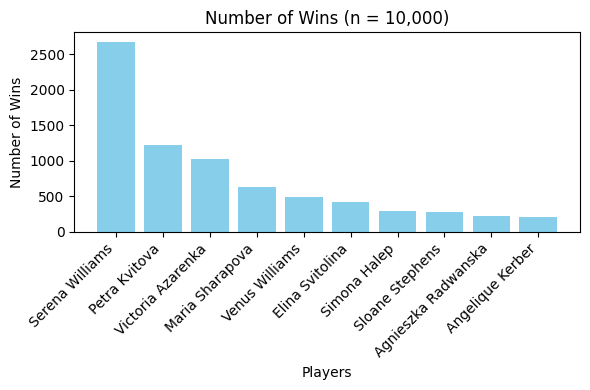

In [31]:
# n = 10000
# Example usage:
random.seed(10)
players_scoring = dict([(player, 0) for player in sorted(unique_women)])
n = 10000  # Number of times to simulate the tournament
results = simulate_tournament_multiple_times(round128players, P, n, players_scoring)
results = dict(sorted(results.items(), key=lambda item: item[1], reverse = True))
print("Tournament Results:")
for player, wins in results.items():
    print(f"{player}: {wins} wins")

df_sim_10000 = pd.DataFrame(list(results.items()), columns=['Player', 'Wins'])
# Take the top 10 players
top_10 = df_sim_10000.head(10)

# Create the histogram
plt.figure(figsize=(6, 4))
plt.bar(top_10['Player'], top_10['Wins'], color='skyblue')
plt.xlabel('Players')
plt.ylabel('Number of Wins')
plt.title('Number of Wins (n = 10,000)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Please note that the code below was not used in my final project.**

In [ ]:
# simulate last match
random.seed(10)
women_in_final = ['Serena Williams', 'Naomi Osaka']
women_in_final_dict = {'Serena Williams': 0, 'Naomi Osaka': 0}
winner = ''

for i in range(10000):
  winner = roundF(women_in_final, P)
  if winner == 'Serena Williams':
    women_in_final_dict['Serena Williams'] += 1
  else:
    women_in_final_dict['Naomi Osaka'] += 1

print(women_in_final_dict)

{'Serena Williams': 9198, 'Naomi Osaka': 802}


In [ ]:
# including duration as a variable
US_Open_2018_copy = US_Open_2018.copy()
US_Open_2018_copy['long_duration'] = (US_Open_2018['minutes'].astype(int) > upper_bound_mins).astype(int)
US_Open_2018_copy = US_Open_2018_copy[~(US_Open_2018_copy['round'] == 'F')]

# count number of matches above upper bound for each player
naomi_dur_mean = US_Open_2018_copy[['minutes']][US_Open_2018_copy['winner_name'] == "Naomi Osaka"].mean()
serena_dur_mean = US_Open_2018_copy[['minutes']][US_Open_2018_copy['winner_name'] == "Serena Williams"].mean()
difference_dur =  serena_dur_mean - naomi_dur_mean # note: equal to 8/3
difference_dur = 8/3

# percentage adjustment
pct_adj = (difference_dur / mean_mins)

In [ ]:
# adjust elo scores
finals_df = last_values_df[(last_values_df['Player'] == 'Naomi Osaka') | (last_values_df['Player'] == 'Serena Williams')]
serena_current = 1873.496841
serena_update = serena_current * (1-pct_adj)

data_finals = {'Player': ['Naomi Osaka', 'Serena Williams'], 'Elo Score': [1452.140332, serena_update]}
finals_df_2 = pd.DataFrame(data_finals)

,Player,Elo Score
0,Naomi Osaka,1452.140332
1,Serena Williams,1823.287857


In [ ]:
# calculate new P matrix
P2 = convert_elo_to_pair_probabilities(finals_df_2)

{'Naomi Osaka': {'Naomi Osaka': 0.5, 'Serena Williams': 0.10559979551067687},
 'Serena Williams': {'Naomi Osaka': 0.8944002044893231,
  'Serena Williams': 0.5}}

In [ ]:
# simulate last match
random.seed(10)
women_in_final = ['Serena Williams', 'Naomi Osaka']
women_in_final_dict = {'Serena Williams': 0, 'Naomi Osaka': 0}
winner = ''

for i in range(10000):
  winner = roundF(women_in_final, P2)
  if winner == 'Serena Williams':
    women_in_final_dict['Serena Williams'] += 1
  else:
    women_in_final_dict['Naomi Osaka'] += 1

print(women_in_final_dict)

{'Serena Williams': 8946, 'Naomi Osaka': 1054}
